code from: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb

running in google collab

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


Use 60,000 images to train the network, 10,000 images to test network. Access the Fashion MNIST directly from TensorFlow

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 
The labels are an array of integers, ranging from 0 to 9. 
These correspond to the class of clothing the image represents: 0 is a shirt, 1 is a trouser, etc...

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

print(len(train_labels))

train_labels

test_images.shape

print(len(test_labels))

60000
10000


Images / data need to be preprocessed

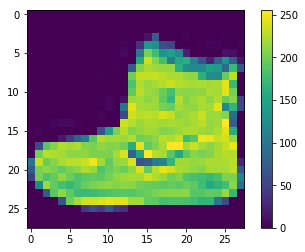

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale from 0 to 1 for neural network

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

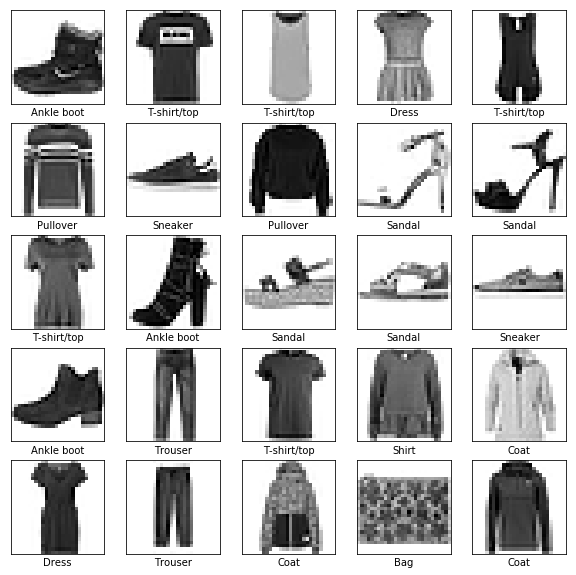

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Set up layers

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


Compile the model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4956 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3741 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3371 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3099 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2937 - acc: 0.8922


Evaluate accuracy

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3511 - acc: 0.8740
Test accuracy: 0.874


"...turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset...gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data..."

**i.e., the accuracy of the test data set is 87%, which is lower than the training data set, 89%, and thus overfitting -- our model has performed worse**

Make predictions:

In [18]:
predictions = model.predict(test_images)

predictions[0]

array([4.1168539e-07, 1.6249345e-09, 7.8991221e-08, 1.6833147e-09,
       6.8734050e-09, 1.2138248e-03, 3.4218044e-07, 3.6024265e-02,
       5.5279637e-05, 9.6270579e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

# we see that prediction was correct

9

Look at some of this visually

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

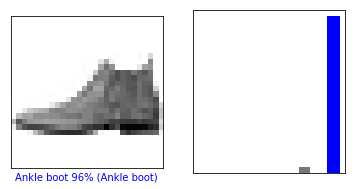

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

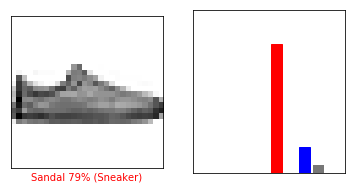

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

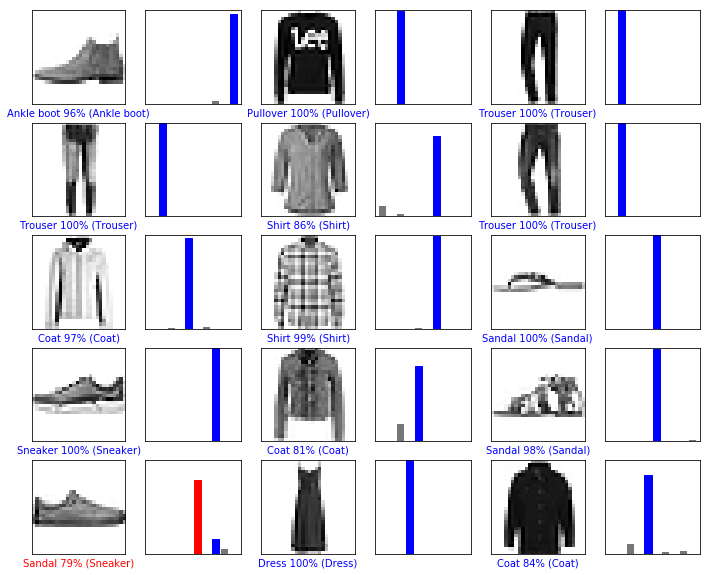

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.1168616e-07 1.6249345e-09 7.8991064e-08 1.6833147e-09 6.8734050e-09
  1.2138266e-03 3.4218044e-07 3.6024291e-02 5.5279685e-05 9.6270579e-01]]


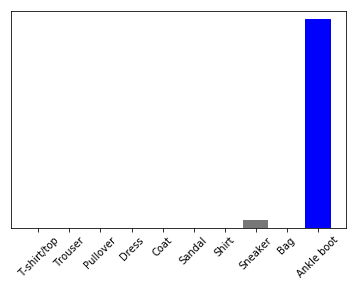

In [32]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


And, as before, the model predicts a label of 9.